# Сравнение ускорения в зависимости от числа узлов и ядер

In [1]:
!ls

better_results_huge.csv     results11.csv  results44.csv
better_results_hugest.csv   results12.csv  results_huge.csv
better_results_small.csv    results13.csv  results_hugest.csv
precise_results_huge.csv    results14.csv  results_small.csv
precise_results_hugest.csv  results24.csv  timing.ipynb
precise_results_small.csv   results34.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Зависимость от числа ядер при использовании одного узла

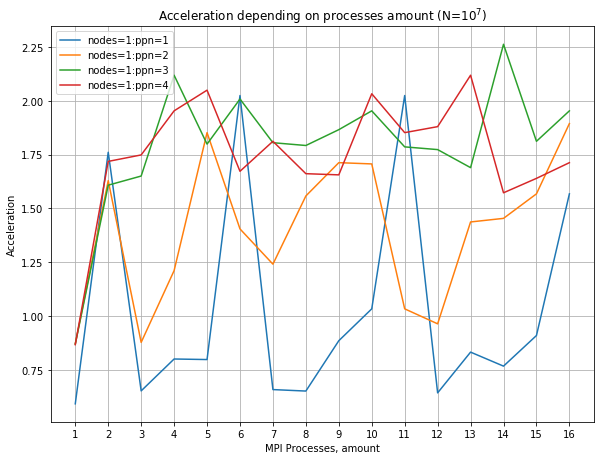

In [3]:
#Solo time, ms
t1 = 50

fig = plt.figure(figsize=(8.5, 6.5))

df14 = pd.read_csv("results14.csv")
df13 = pd.read_csv("results13.csv")
df12 = pd.read_csv("results12.csv")
df11 = pd.read_csv("results11.csv")

ax = fig.add_subplot(111)
ax.set_title(r'Acceleration depending on processes amount (N=$10^7$)')
ax.set_xlabel('MPI Processes, amount')
ax.set_ylabel('Acceleration')
ax.plot(df11.values[:, 0], t1/df11.values[:, 1], label='nodes=1:ppn=1')
ax.plot(df12.values[:, 0], t1/df12.values[:, 1], label='nodes=1:ppn=2')
ax.plot(df13.values[:, 0], t1/df13.values[:, 1], label='nodes=1:ppn=3')
ax.plot(df14.values[:, 0], t1/df14.values[:, 1], label='nodes=1:ppn=4')

ax.set_xticks(np.arange(1, 17))
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()

## Зависимость от числа узлов при использовании 4х ядер

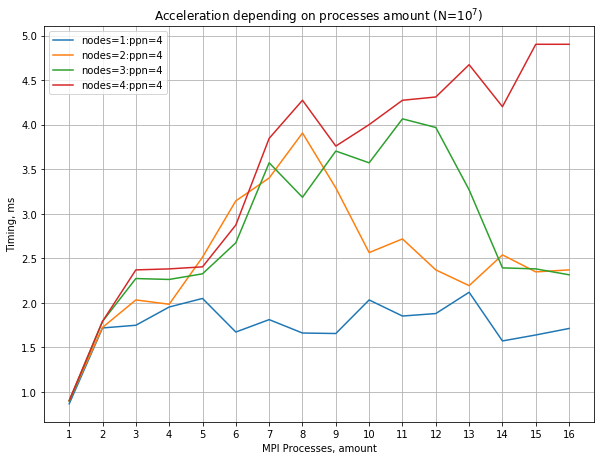

In [4]:
#Solo time, ms
t1 = 50

fig = plt.figure(figsize=(8.5, 6.5))

df14 = pd.read_csv("results14.csv")
df24 = pd.read_csv("results24.csv")
df34 = pd.read_csv("results34.csv")
df44 = pd.read_csv("results44.csv")

ax = fig.add_subplot(111)
ax.set_title(r'Acceleration depending on processes amount (N=$10^7$)')
ax.set_xlabel('MPI Processes, amount')
ax.set_ylabel('Timing, ms')
ax.plot(df14.values[:, 0], t1/df14.values[:, 1], label='nodes=1:ppn=4')
ax.plot(df24.values[:, 0], t1/df24.values[:, 1], label='nodes=2:ppn=4')
ax.plot(df34.values[:, 0], t1/df34.values[:, 1], label='nodes=3:ppn=4')
ax.plot(df44.values[:, 0], t1/df44.values[:, 1], label='nodes=4:ppn=4')

ax.set_xticks(np.arange(1, 17))
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()

## Зависимость от общего числа подзадач

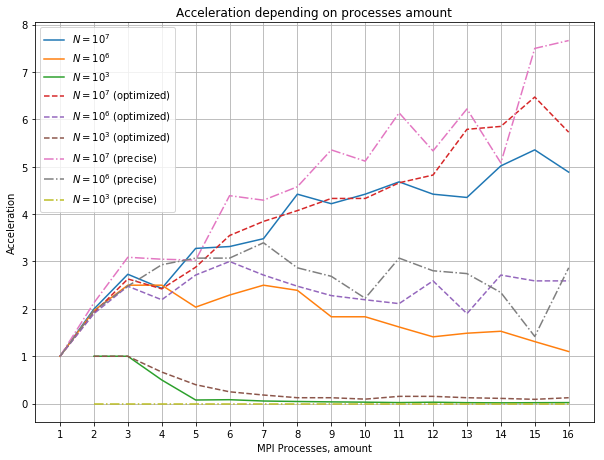

In [8]:
#Solo time, ms
t1 = 50
t2 = 5

fig = plt.figure(figsize=(8.5, 6.5))

df3 = pd.read_csv("results_hugest.csv")
df1 = pd.read_csv("results_huge.csv")
df2 = pd.read_csv("results_small.csv")

df6 = pd.read_csv("better_results_hugest.csv")
df4 = pd.read_csv("better_results_huge.csv")
df5 = pd.read_csv("better_results_small.csv")

df9 = pd.read_csv("precise_results_hugest.csv")
df7 = pd.read_csv("precise_results_huge.csv")
df8 = pd.read_csv("precise_results_small.csv")

ax = fig.add_subplot(111)
ax.set_title(r'Acceleration depending on processes amount')
ax.set_xlabel('MPI Processes, amount')
ax.set_ylabel('Acceleration')
ax.plot(df3.values[:, 0], df3.values[0, 1]/df3.values[:, 1], 
        label=r'$N = 10^7$')
ax.plot(df1.values[:, 0], df1.values[0, 1]/df1.values[:, 1], 
        label=r'$N = 10^6$')
ax.plot(df2.values[1:, 0], df2.values[1, 1]/df2.values[1:, 1], 
        label=r'$N = 10^3$')

ax.plot(df6.values[:, 0], df6.values[0, 1]/df6.values[:, 1], 
        label=r'$N = 10^7$ (optimized)', linestyle='--')
ax.plot(df4.values[:, 0], df4.values[0, 1]/df4.values[:, 1], 
        label=r'$N = 10^6$ (optimized)', linestyle='--')
ax.plot(df5.values[1:, 0], df5.values[1, 1]/df5.values[1:, 1], 
        label=r'$N = 10^3$ (optimized)', linestyle='--')

ax.plot(df9.values[:, 0], df9.values[0, 1]/df9.values[:, 1], 
        label=r'$N = 10^7$ (precise)', linestyle='-.')
ax.plot(df7.values[:, 0], df7.values[0, 1]/df7.values[:, 1], 
        label=r'$N = 10^6$ (precise)', linestyle='-.')
ax.plot(df8.values[1:, 0], df8.values[0, 1]/df8.values[1:, 1], 
        label=r'$N = 10^3$ (precise)', linestyle='-.')

ax.set_xticks(np.arange(1, 17))
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()

## Сравнение Scatter-Reduce и Send-Recv версий  

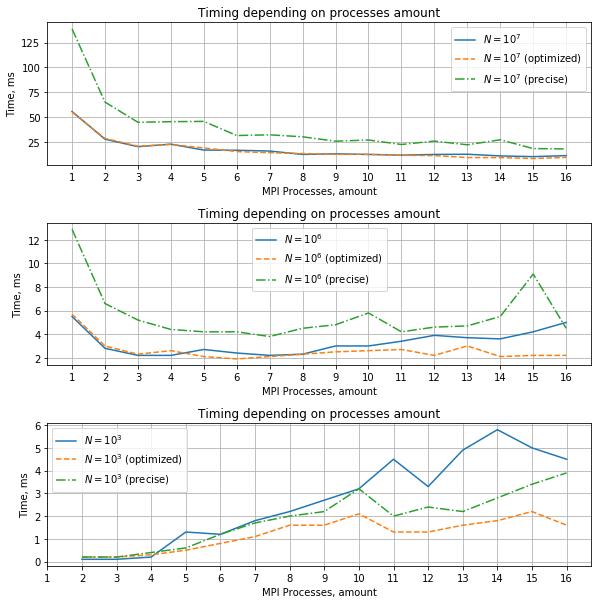

In [9]:
fig = plt.figure(figsize=(8.5, 8.5))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

df3 = pd.read_csv("results_hugest.csv")
df1 = pd.read_csv("results_huge.csv")
df2 = pd.read_csv("results_small.csv")

df6 = pd.read_csv("better_results_hugest.csv")
df4 = pd.read_csv("better_results_huge.csv")
df5 = pd.read_csv("better_results_small.csv")

df9 = pd.read_csv("precise_results_hugest.csv")
df7 = pd.read_csv("precise_results_huge.csv")
df8 = pd.read_csv("precise_results_small.csv")

ax1.set_title(r'Timing depending on processes amount')
ax1.set_xlabel('MPI Processes, amount')
ax1.set_ylabel('Time, ms')

ax1.plot(df3.values[:, 0], df3.values[:, 1], label=r'$N = 10^7$')
ax1.plot(df6.values[:, 0], df6.values[:, 1], label=r'$N = 10^7$ (optimized)', 
        linestyle='--')
ax1.plot(df9.values[:, 0], df9.values[:, 1], label=r'$N = 10^7$ (precise)', 
        linestyle='-.')

ax2.set_title(r'Timing depending on processes amount')
ax2.set_xlabel('MPI Processes, amount')
ax2.set_ylabel('Time, ms')

ax2.plot(df1.values[:, 0], df1.values[:, 1], label=r'$N = 10^6$')
ax2.plot(df4.values[:, 0], df4.values[:, 1], label=r'$N = 10^6$ (optimized)',
        linestyle='--')
ax2.plot(df7.values[:, 0], df7.values[:, 1], label=r'$N = 10^6$ (precise)',
        linestyle='-.')

ax3.set_title(r'Timing depending on processes amount')
ax3.set_xlabel('MPI Processes, amount')
ax3.set_ylabel('Time, ms')

ax3.plot(df2.values[1:, 0], df2.values[1:, 1], label=r'$N = 10^3$')
ax3.plot(df5.values[1:, 0], df5.values[1:, 1], label=r'$N = 10^3$ (optimized)',
        linestyle='--')
ax3.plot(df8.values[1:, 0], df8.values[1:, 1], label=r'$N = 10^3$ (precise)',
        linestyle='-.')

ax1.set_xticks(np.arange(1, 17))
ax2.set_xticks(np.arange(1, 17))
ax3.set_xticks(np.arange(1, 17))
ax1.legend()
ax2.legend()
ax3.legend()
ax1.grid()
ax2.grid()
ax3.grid()

plt.tight_layout()
plt.show()